# Modify Neural Network (Iris Dataset)


**Load and Preprocess the Iris Dataset:**

The Iris dataset is a simple classification dataset with three classes (Setosa, Versicolor, and Virginica).

Features (X) represent petal/sepal length and width.

Labels (y) are one-hot encoded using OneHotEncoder so the model can handle multi-class classification.

**Split Data into Train, Validation, and Test Sets:**

The dataset is divided into training (60%), validation (20%), and test (20%) sets.

Training data is used to fit the model.

Validation data helps monitor the model’s performance during training.
Test data evaluates final performance on unseen data.


**Architecture:**

**Input Layer:** Takes four features as input (since the Iris dataset has four features).

**Hidden Layers:**
One hidden layer with 8 neurons and ReLU activation.

An additional hidden layer with 16 neurons and ReLU activation (the modification you requested).

**Output Layer:** A softmax activation function with 3 neurons (one for each class).

The added layer increases the model’s learning capacity.

Compile and Train the Model:

**Optimizer:**
Adam, which adjusts learning rates dynamically.

**Loss Function: **Categorical Crossentropy, suitable for multi-class classification.

The model trains for 50 epochs, with validation loss and accuracy monitored.

**Visualize Performance:**

Training/validation loss and accuracy are plotted over epochs to observe convergence.

This helps assess if the model is underfitting, overfitting, or performing well.

**Evaluate the Model on Test Data:**

The test set evaluates final performance, reporting accuracy and loss.

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3520 - loss: 3.4031 - val_accuracy: 0.4000 - val_loss: 2.7249
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2929 - loss: 2.9019 - val_accuracy: 0.4000 - val_loss: 2.0806
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3234 - loss: 2.1560 - val_accuracy: 0.4000 - val_loss: 1.5983
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2580 - loss: 1.8174 - val_accuracy: 0.4000 - val_loss: 1.2583
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2921 - loss: 1.4166 - val_accuracy: 0.4000 - val_loss: 1.0613
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3321 - loss: 1.1132 - val_accuracy: 0.6000 - val_loss: 0.9533
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5449 - loss: 1.0816 - val_accuracy: 0.8000 - val_loss: 0.8967
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6847 - loss: 0.9894 - val_accuracy: 0.8000 - val_loss: 0.8564
Ep

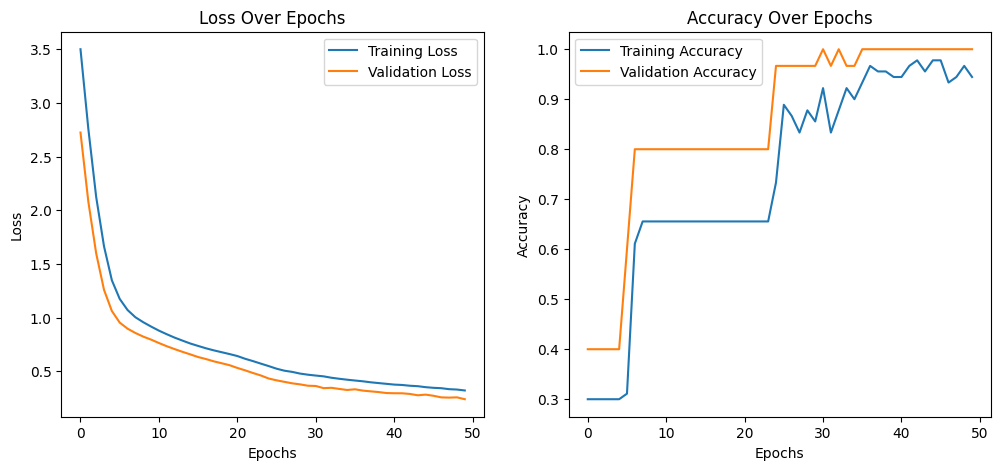

In [2]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load and preprocess the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
y = y.reshape(-1, 1)
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the modified neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),  # Added hidden layer
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=8)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Plot training and validation loss/accuracy
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# Part 2: Apply Neural Network to Wine Dataset

**Load and Preprocess the Wine Dataset:**

The Wine dataset is another multi-class classification problem with 13 features and 3 classes.

Features are standardized using StandardScaler to normalize the data.
Labels are one-hot encoded for compatibility with the softmax output layer.

**Split Data into Train, Validation, and Test Sets:**

Similar to the Iris dataset, the data is divided into 60% training, 20% validation, and 20% test sets.


**Architecture:**

**Input Layer:** Takes 13 features as input.

**Hidden Layers:**

One with 8 neurons and ReLU activation.
Another with 16 neurons and ReLU activation.

**Output Layer:** A softmax activation with 3 neurons for classification.
This architecture is suited to handle the increased complexity of the Wine dataset.

**Train and Evaluate the Model:**

The training process is similar to that of the Iris dataset, with loss and accuracy monitored.
The test set evaluates final performance.

**Visualize Training/Validation Results:**

Plots show the loss and accuracy over epochs to assess performance trends.

**Confusion Matrix for Test Predictions:**

A confusion matrix visualizes the performance of the model by showing actual versus predicted labels.

Helps identify specific areas where the model struggles (e.g., misclassifications).

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.4429 - loss: 1.0691 - val_accuracy: 0.3611 - val_loss: 1.1280
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4115 - loss: 1.0280 - val_accuracy: 0.3333 - val_loss: 1.0768
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4335 - loss: 0.9729 - val_accuracy: 0.3333 - val_loss: 1.0308
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3683 - loss: 0.9545 - val_accuracy: 0.3889 - val_loss: 0.9907
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4470 - loss: 0.8860 - val_accuracy: 0.4722 - val_loss: 0.9557
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5130 - loss: 0.8229 - val_accuracy: 0.6111 - val_loss: 0.9180
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6435 - loss: 0.7822 - val_accuracy: 0.6667 - val_loss: 0.8785
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6973 - loss: 0.7019 - val_accuracy: 0.6667 - val_loss: 0.8

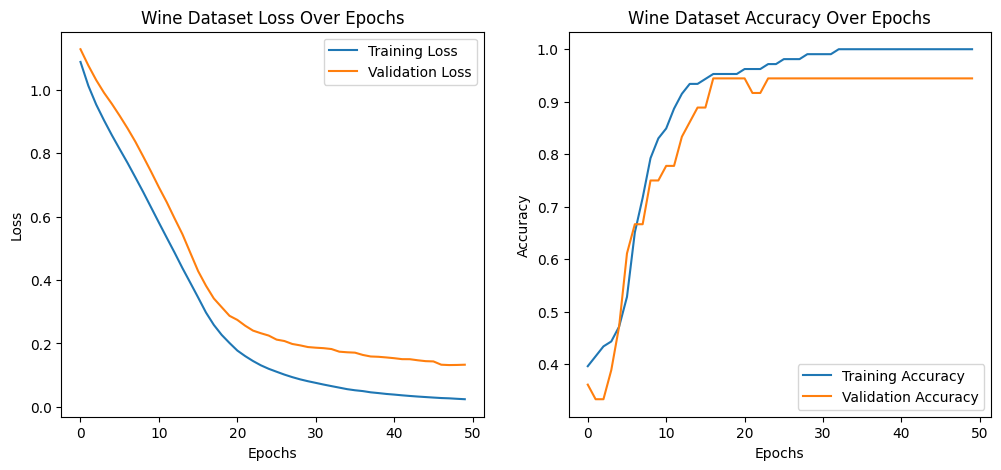

In [3]:
# Import Wine dataset
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load and preprocess the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target
y = y.reshape(-1, 1)
y = encoder.fit_transform(y)  # One-hot encode the labels

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the neural network for the Wine dataset
model_wine = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model_wine.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_wine = model_wine.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=8)

# Evaluate the model
test_loss_wine, test_accuracy_wine = model_wine.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss_wine}, Test Accuracy: {test_accuracy_wine}")

# Visualize results
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history_wine.history['loss'], label='Training Loss')
plt.plot(history_wine.history['val_loss'], label='Validation Loss')
plt.title('Wine Dataset Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history_wine.history['accuracy'], label='Training Accuracy')
plt.plot(history_wine.history['val_accuracy'], label='Validation Accuracy')
plt.title('Wine Dataset Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


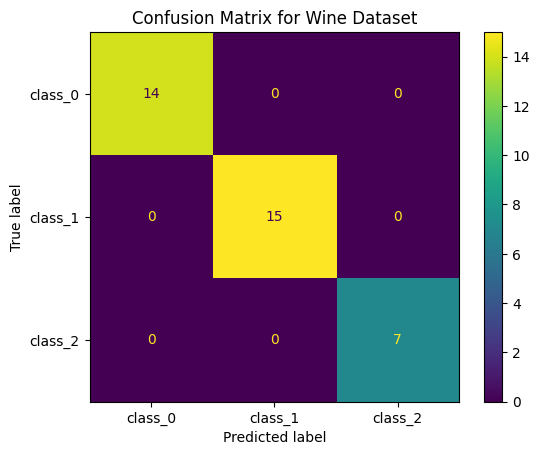

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = model_wine.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix for Wine Dataset')
plt.show()


# Discussion and Observations
**Effect of Adding an Additional Layer:**

Adding a second hidden layer increased the capacity of the neural network, allowing it to learn more complex patterns.
In smaller datasets like Iris, this may lead to slight improvements or overfitting, depending on the dataset size and training duration.

**Comparison Between Iris and Wine Datasets:**

The Wine dataset has more features and complexity, so it benefits more from deeper neural networks.
Standardization of features in the Wine dataset ensures numerical stability and better learning.
Iris dataset trains faster due to its smaller size and simpler feature space.